# Viz with cleaned raw data

In [130]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
from data_clean import Cleaner
clnr = Cleaner()
clnr.stage_cleaning(df)
clean_data = clnr.clean(df)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
Android         40000 non-null uint8
rider_rtg       40000 non-null float64
driver_rtg      40000 non-null float64
avg_dist        40000 non-null float64
avg_surge       40000 non-null float64
surge_pct       40000 non-null float64
first_30        40000 non-null int64
black           40000 non-null int64
weekday_pct     40000 non-null float64
surge_bool      40000 non-null float64
risky_rating    40000 non-null bool
Astapor         40000 non-null uint8
Winterfell      40000 non-null uint8
dtypes: bool(1), float64(7), int64(2), uint8(3)
memory usage: 2.9 MB


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [132]:
clean_data.head()

,Android,rider_rtg,driver_rtg,avg_dist,avg_surge,surge_pct,first_30,black,weekday_pct,surge_bool,risky_rating,Astapor,Winterfell
0,1,0.496702,0.647848,0.201242,1.00,0.0,0,0,100.0,0.0,True,1,0
1,1,0.496702,0.647848,0.397455,1.00,0.0,2,1,0.0,0.0,True,1,0
2,0,-1.735001,0.273532,2.752022,1.00,0.0,1,1,100.0,0.0,True,0,1
3,1,0.496702,0.273532,0.642723,2.75,100.0,1,0,100.0,1.0,True,0,1
4,0,0.496702,0.273532,1.397796,1.00,0.0,0,0,100.0,0.0,True,0,1


In [133]:
clean_data.loc[df['last_trip_date'] > '2014-05-31', 'churn'] = 0  # did not churns
clean_data.loc[df['last_trip_date'] < '2014-06-01', 'churn'] = 1  # did churns

In [142]:
clean_data.tail()

,Android,rider_rtg,driver_rtg,avg_dist,avg_surge,surge_pct,first_30,black,weekday_pct,surge_bool,risky_rating,Astapor,Winterfell,churn
39995,1,0.050362,-0.490716,-0.653690,1.08,9.5,8,0,90.5,1.0,True,0,1,1.0
39996,0,0.496702,0.647848,-0.655442,1.00,0.0,2,0,85.7,0.0,True,0,0,1.0
39997,1,0.496702,0.647848,-0.482003,1.00,0.0,3,1,33.3,0.0,True,0,1,0.0
39998,0,-1.065490,-2.117235,-0.403167,1.50,40.0,5,0,60.0,1.0,True,1,0,1.0
39999,0,-0.172809,0.647848,-0.270022,1.00,0.0,2,1,42.9,0.0,True,1,0,0.0


In [135]:
# for col in list(clean_data.columns):
#     plt.scatter(clean_data[col], clean_data['churn'])
#     plt.xlabel(col)
#     plt.show()

In [136]:
pivot_mean = pd.pivot_table(clean_data, columns='churn', aggfunc=np.mean)
pivot_mean

churn,0.0,1.0
Android,0.167509,0.381889
Astapor,0.224388,0.395026
Winterfell,0.435471,0.483579
avg_dist,-0.120334,0.0724472
avg_surge,1.07405,1.0755
black,0.505322,0.298382
driver_rtg,0.0100937,0.0654392
first_30,3.31553,1.65768
rider_rtg,-0.0342033,0.0238149
risky_rating,True,True


In [137]:
# pivot_median = pd.pivot_table(clean_data, columns='churn', aggfunc=np.median)
# pivot_median

### Creating a dataframe (from 'pivot_mean' table) more amenable to seaborn barplot

In [138]:
churn_col = pd.DataFrame(pivot_mean[1])
churn_col['churn'] = 1
churn_col.columns = ['mean', 'churn']

In [139]:
non_churn_col = pd.DataFrame(pivot_mean[0])
non_churn_col['churn'] = 0
non_churn_col.columns = ['mean', 'churn']

In [140]:
new_df = churn_col.append(non_churn_col)
new_df.reset_index(level=0, inplace=True)

#dropping acct_age and inactive_days because they're uninformative and skew the y-axis of the plot below
viz_df = new_df[(new_df['index'] != 'acct_age') & (new_df['index'] != 'inactive_days')]
viz_df

,index,mean,churn
0,Android,0.381889,1
1,Astapor,0.395026,1
2,Winterfell,0.483579,1
3,avg_dist,0.0724472,1
4,avg_surge,1.0755,1
5,black,0.298382,1
6,driver_rtg,0.0654392,1
7,first_30,1.65768,1
8,rider_rtg,0.0238149,1
9,risky_rating,True,1


Text(0.5, 1.0, 'Unscaled data')

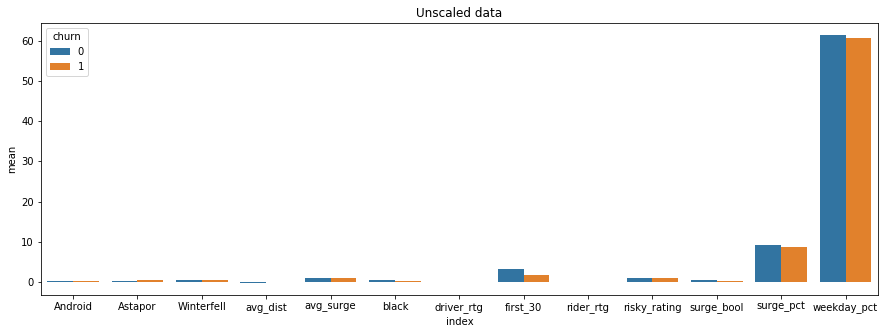

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x='index', y='mean', hue='churn', data=viz_df)
plt.title('Unscaled data')